In [2]:
import pandas as pd

first_df = pd.read_csv('First_Day_Dataset.csv')
# last_df = pd.read_csv('Last_Day_Dataset.csv')

In [3]:
#매달 첫 영업일
first_df

,Unnamed: 0,^GSPC,EFA,^FNAR,GD=F
0,2012-02-01,1324.089966,38.426586,147.039993,660.250000
1,2012-03-01,1374.089966,40.109928,145.610001,713.000000
2,2012-04-02,1419.040039,40.291321,151.190002,701.700012
3,2012-05-01,1405.819946,39.159424,156.350006,688.000000
4,2012-06-01,1278.040039,33.775635,144.429993,580.500000
...,...,...,...,...,...
85,2020-08-03,3294.610107,59.312443,197.529999,343.950012
86,2020-09-01,3526.649902,60.990746,200.250000,360.100006
87,2020-10-01,3380.800049,60.025017,194.470001,343.100006
88,2020-11-02,3310.239990,58.309212,189.720001,345.850006


## 가격 데이터프레임을 수익률 데이터 프레임으로 바꿔주기

In [49]:
pct_df = first_df

In [50]:
pct_df['S&P'] = pct_df.loc[:,'^GSPC'].pct_change()
pct_df['EurAsia'] = pct_df.loc[:,'EFA'].pct_change()
pct_df['Real_Estate'] = pct_df.loc[:,'^FNAR'].pct_change()
pct_df['Commodity'] = pct_df.loc[:,'GD=F'].pct_change()

pct_df


,Unnamed: 0,^GSPC,EFA,^FNAR,GD=F,S&P,EurAsia,Real_Estate,Commodity
0,2012-02-01,1324.089966,38.426586,147.039993,660.250000,NaN,NaN,NaN,NaN
1,2012-03-01,1374.089966,40.109928,145.610001,713.000000,0.037762,0.043807,-0.009725,0.079894
2,2012-04-02,1419.040039,40.291321,151.190002,701.700012,0.032713,0.004522,0.038322,-0.015849
3,2012-05-01,1405.819946,39.159424,156.350006,688.000000,-0.009316,-0.028093,0.034129,-0.019524
4,2012-06-01,1278.040039,33.775635,144.429993,580.500000,-0.090894,-0.137484,-0.076239,-0.156250
...,...,...,...,...,...,...,...,...,...
85,2020-08-03,3294.610107,59.312443,197.529999,343.950012,0.057368,0.035352,0.001521,0.049428
86,2020-09-01,3526.649902,60.990746,200.250000,360.100006,0.070430,0.028296,0.013770,0.046954
87,2020-10-01,3380.800049,60.025017,194.470001,343.100006,-0.041356,-0.015834,-0.028864,-0.047209
88,2020-11-02,3310.239990,58.309212,189.720001,345.850006,-0.020871,-0.028585,-0.024425,0.008015


In [51]:
pct_df = pct_df.drop(['^GSPC', 'EFA', '^FNAR', 'GD=F'] , axis=1)

In [52]:
pct_df = pct_df.dropna()
pct_df


,Unnamed: 0,S&P,EurAsia,Real_Estate,Commodity
1,2012-03-01,0.037762,0.043807,-0.009725,0.079894
2,2012-04-02,0.032713,0.004522,0.038322,-0.015849
3,2012-05-01,-0.009316,-0.028093,0.034129,-0.019524
4,2012-06-01,-0.090894,-0.137484,-0.076239,-0.156250
5,2012-07-02,0.068441,0.105512,0.082808,0.031008
...,...,...,...,...,...
85,2020-08-03,0.057368,0.035352,0.001521,0.049428
86,2020-09-01,0.070430,0.028296,0.013770,0.046954
87,2020-10-01,-0.041356,-0.015834,-0.028864,-0.047209
88,2020-11-02,-0.020871,-0.028585,-0.024425,0.008015


In [53]:
pct_df = pct_df.drop(['Unnamed: 0'] , axis=1)
pct_df

,S&P,EurAsia,Real_Estate,Commodity
1,0.037762,0.043807,-0.009725,0.079894
2,0.032713,0.004522,0.038322,-0.015849
3,-0.009316,-0.028093,0.034129,-0.019524
4,-0.090894,-0.137484,-0.076239,-0.156250
5,0.068441,0.105512,0.082808,0.031008
...,...,...,...,...
85,0.057368,0.035352,0.001521,0.049428
86,0.070430,0.028296,0.013770,0.046954
87,-0.041356,-0.015834,-0.028864,-0.047209
88,-0.020871,-0.028585,-0.024425,0.008015


# 초기 투자 비중 설정 

### 단순히 2:1:1:1로 하려고 하였으나 최적화 관점에서 옳지 않다는 평을 받았습니다. 

### 따라서 efficient frontier 관점에서 구해보는 것이 어떨까하며 시도해보았습니다. 

### Sharp ratio를 최대화하는 포트폴리오의 자산 비중을 초기 투자 비중으로 택했습니다. 


## Risk Free Rate은 무엇으로 할지?
### FEDFUNDS = fred_data_loader('FEDFUNDS')
### 해당 기간 동안의 federal fund rate의 mean으로 해보았습니다. 
### risk_free_rate= FEDFUNDS.mean()
### 하지만 0.6정도로 너무 높게 나와서 Hull, J.C., 2018. Options, Futures and Other Derivatives, 10e. Aufl., New York. 책에 나온 무위험 이자율 0.01을 참고했습니다. 


In [54]:
import pandas_datareader.data as web

def fred_data_loader(ticker):
    data = web.DataReader([ticker],'fred',start='2012.01.01', end='2020.12.31')
    data.rename(columns = {'Adj Close':ticker}, inplace=True)
#   data.rename(columns = {'DATE':'Date'}, inplace=True)
    data = data[str(ticker)]
    
    plt.figure(figsize=(14,6))
    plt.title(ticker+ ' History', fontsize=18)
    plt.plot(data)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(ticker, fontsize=18)
    plt.show()
    
    
    return data

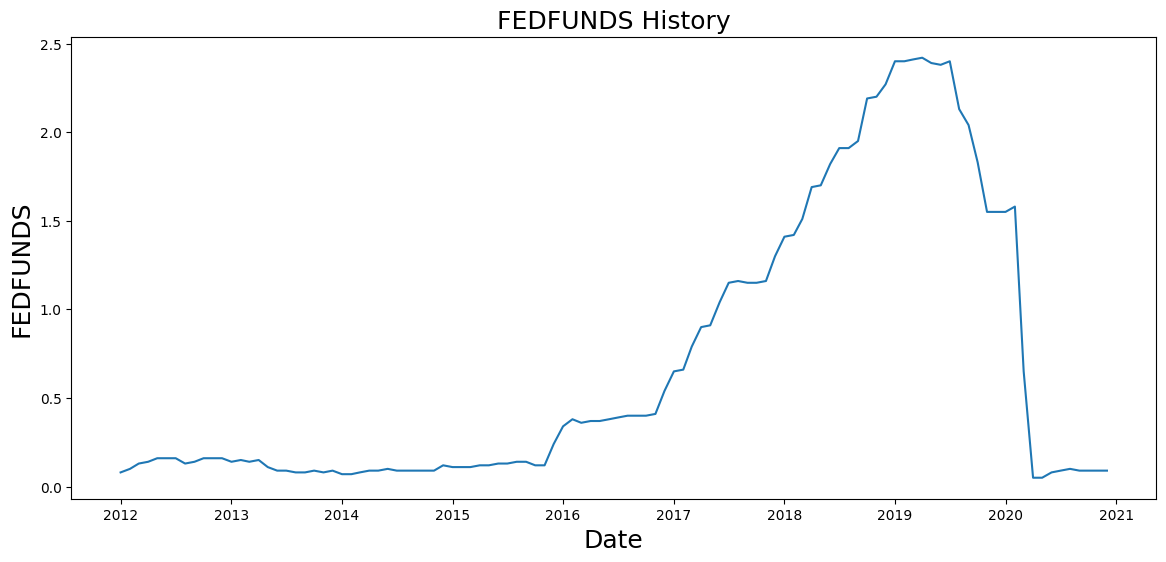

risk-free rate: 0.6924074074074076


In [111]:
# Risk Free Rate
# FEDFUNDS = fred_data_loader('FEDFUNDS')
# 해당 기간 동안의 federal fund rate의 mean으로 해보았습니다. 
# risk_free_rate= FEDFUNDS.mean()
# print("risk-free rate:", risk_free_rate) 

risk-free rate가 너무 높게 나와, 0.01로 설정했습니다. 
Hull 책을 참고했습니다. 

In [195]:
risk_free_rate = 0.01

In [196]:
import numpy as np

In [262]:
n_assets = 4
n_portfolios = 1000
np.random.seed(75)
mean_variance = []
Annual = (1+pct_df.mean())**12 - 1
cov = pct_df.cov()*12

for i in range(n_portfolios):
    pair_list=[]
    assets = np.random.choice(list(pct_df.columns), n_assets, replace=False)
    weights = np.random.rand(n_assets)
    weights = weights/sum(weights)

    portfolio_Variance = 0 
    portfolio_Return = 0
    for i in range(len(assets)):
        portfolio_Return += weights[i] * Annual.loc[assets[i]]
        for j in range(len(assets)):
            portfolio_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
    pair_list.append(portfolio_Return)
    pair_list.append(portfolio_Variance)
    #weight도 list에 넣어줘서 나중에 샤프비율을 기준으로 선택된 포트폴리오의 자산 비중을 알도록 한다. 
    pair_list.append(weights)
            
    mean_variance.append(pair_list)

In [263]:
import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
Std = []
for i in (mean_variance):
    temp = np.sqrt(i[1])
    Std.append(temp)
    
Std

[0.15973061737872926,
 0.1680342476876825,
 0.16951815003701007,
 0.1630669616706663,
 0.1607684221401513,
 0.15696096039652416,
 0.1687548301871559,
 0.15832191592388198,
 0.16255504805780255,
 0.16727210591274302,
 0.16267590099522813,
 0.1568684248956069,
 0.15941913619492787,
 0.1652226038943381,
 0.16932119878033958,
 0.16445891859800443,
 0.15722535986870087,
 0.18002761566355488,
 0.15752414024758832,
 0.15853658230331227,
 0.1811415052474606,
 0.17648401002495348,
 0.16307304760250635,
 0.16892258693163334,
 0.17211377728674448,
 0.1796910620693862,
 0.1651606049658367,
 0.20198799619512486,
 0.17171914617818432,
 0.16100428964427876,
 0.1664405845799222,
 0.16311551741291824,
 0.16437865244107336,
 0.15869057139417178,
 0.1603392519182712,
 0.18228642663041486,
 0.1685867661363783,
 0.1654125874969492,
 0.17530758251713435,
 0.1909090129589773,
 0.16216004669808792,
 0.1710573762225292,
 0.16074152717675194,
 0.1796956534899388,
 0.16850590890137712,
 0.1634908085822873,
 0.16

In [265]:
Return = []
for i in (mean_variance):
    temp = i[0]
    Return.append(temp)
    
Return

[0.0783007850677297,
 0.04688491732747669,
 0.051082787140747016,
 0.06111330059058821,
 0.07338799302460083,
 0.10413427896284545,
 0.06694839289584545,
 0.09450163838222429,
 0.10465151405136472,
 0.07228653833894133,
 0.06833117764287994,
 0.10671954007390448,
 0.07473079503956999,
 0.052057891228171685,
 0.06602526015786336,
 0.06069266726917971,
 0.11368840263491073,
 0.06558718158254435,
 0.1243834863827142,
 0.08786714140256296,
 0.06395454331349262,
 0.052786905758071045,
 0.07250145961963941,
 0.06686794289551401,
 0.06394530921846452,
 0.057898748541791216,
 0.06783309907831644,
 0.02069213807346479,
 0.0461350314945251,
 0.07698708342566447,
 0.08952056086507326,
 0.09590205535751586,
 0.0533730477360048,
 0.08555631950393193,
 0.08131019996840377,
 0.04816739353026658,
 0.07326994146957695,
 0.08199618209685078,
 0.06327743131076148,
 0.035348607532606456,
 0.08978160669900359,
 0.05769402469127063,
 0.0678864012061734,
 0.06283034204637802,
 0.05261835928587239,
 0.0859077

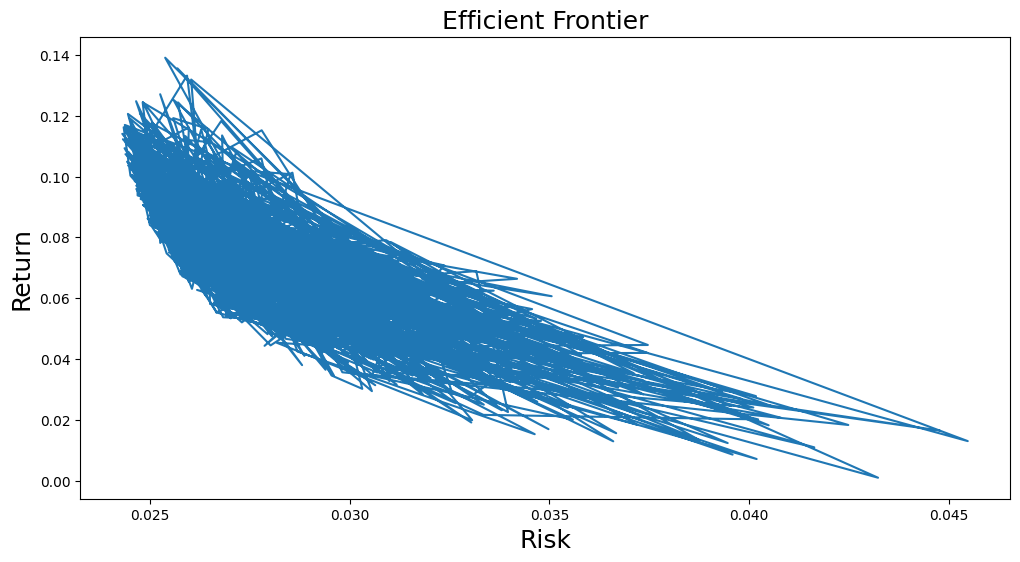

In [266]:
plt.figure(figsize=(12,6))
plt.title('Efficient Frontier', fontsize=18)
plt.plot(Var,Return)
plt.xlabel('Risk', fontsize=18)
plt.ylabel('Return', fontsize=18)
plt.show()

## Efficient Frontier를 그린 무작위 생성 포트폴리오에서 샤프비율이 가장 큰  것의 자산 비중을 초기 투자 비중으로 선택. 





In [152]:
sharp = []
for ret,std in zip(Return, Std):
    sharp_each = (ret - risk_free_rate)/std
    sharp.append(sharp_each)
    
sharp

[0.4275998314448703,
 0.21950833139701964,
 0.24235037446891444,
 0.3134497636242084,
 0.3942813655864694,
 0.5997305235966818,
 0.337462298606134,
 0.5337330456691226,
 0.5822736062783349,
 0.37236655806457597,
 0.3585729495642443,
 0.6165647429574791,
 0.4060415617885495,
 0.2545528894767221,
 0.33088154679642295,
 0.3082390891374548,
 0.6594890463058953,
 0.30877030380954784,
 0.7261330625447765,
 0.4911619783349909,
 0.29785853462895967,
 0.2424406933637858,
 0.38327277584207486,
 0.3366509116896825,
 0.3134281872658614,
 0.2665616641705613,
 0.3501627951186008,
 0.0529345222234689,
 0.21043099909796661,
 0.41605775581299764,
 0.4777714586005237,
 0.5266332518202997,
 0.26386058707686033,
 0.47612355819336905,
 0.44474574450897597,
 0.20938143467835293,
 0.37529601474409163,
 0.4352521364081718,
 0.3039083110141811,
 0.13277847462368572,
 0.49199299287044623,
 0.27881887203288613,
 0.3601210105620143,
 0.2939989978629951,
 0.2529190790028378,
 0.46429366167383707,
 0.46237895937593

In [153]:
len(sharp)

1000

In [154]:
sorted_sharp = sorted(sharp)
max_sharp = sorted_sharp[-1]
max_sharp

0.8101767647755925

In [155]:
sharp.index(max_sharp)

533

In [157]:
selected_portfolio = mean_variance[sharp.index(max_sharp)]
selected_weight = selected_portfolio[-1]
selected_weight

array([0.24295694, 0.69729744, 0.04978756, 0.00995805])

### 위에서 구한 비중으로 초기 자산의 비중을 구성한다. 